<a href="https://colab.research.google.com/github/vavvari/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20.1 Numerical Differentiation Problem Statement**

 An evenly spaced set of points over the domain of a function over some interval is referred to as a numerical grid. We call the distance between each adjacent point on the grid the spacing or step size of the grid.

 With Python, we can represent any function over an interval by computing values on the grid. This style of discrete representation can be useful in numerical calculations involving various data sets.

 Both analytic functions and discrete representations have methods of approximating the derivative of the function over a numerical grid.

**20.2 Finite Difference Approximating Derivatives**

The forward difference is used to estimate the slope of the function at $x_j$ and uses the line that connects $(x_j,f(x_j))$ and is represented as

$f′(x_j)=(f(x_j+1)−f(x_j))/(x_(j+1)−x_j)$

The backward difference is used to estimate the slope of the function at $x_j$ and uses the line that connects $(x_(j−1),f(x_(j−1)))$ and $(x_j,f(x_j))$, represented by

$f′(x_j)=(f(x_j)−f(x_j−1))/(x_j−x_(j−1))$

The central difference is used to estimate the slope of the function at $x_j$ using the line that connects $(x_(j−1),f(x_(j−1)))$
 and (x_(j+1),f(x_(j+1)))$, and is represented as

$f′(x_j)=f(x_(j+1))−f(x_(j−1))/(x_(j+1)−x_(j−1))$

We can use these methods to compute the derivative of a function, such as sin(x) in the next example.

<ipython-input-1-0e7a5531f02b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


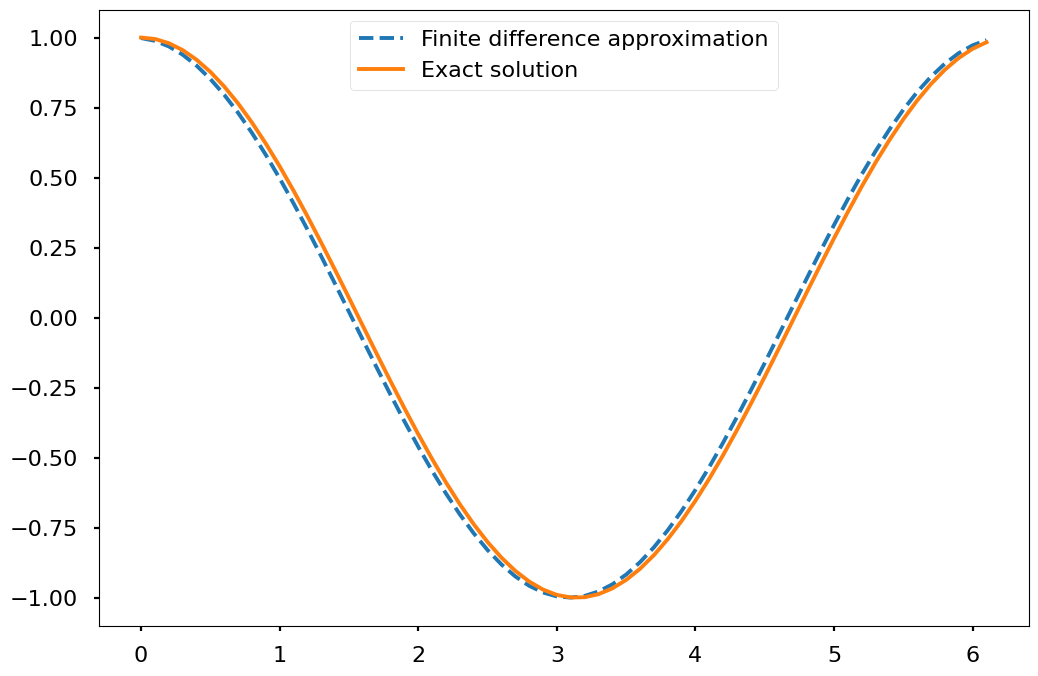

0.04997515074549317


In [1]:
# imports for plot functionalities
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# step size
h = 0.1
# set up grid
x = np.arange(0, 2*np.pi, h)
# function to derive
y = np.sin(x)

# vector of forward differences
forward_diff = np.diff(y)/h
# build corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = np.cos(x_diff)

# plotting the solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# computing error between exact and calculated difference
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

**20.3 Approximating of Higher Order Differences**

When approximating higher order derivatives like f''(x), we can take the Taylor series around $a=x_j$ and compute it at $x=x_{j−1}$
 and $x_{j+1}$, which then gives us the following equations:

 $f(x_{j-1}) = f(x_j) - hf^{\prime}(x_j) + \frac{h^2f''(x_j)}{2} - \frac{h^3f'''(x_j)}{6} + \cdots$

 $f(x_{j+1}) = f(x_j) + hf^{\prime}(x_j) + \frac{h^2f''(x_j)}{2} + \frac{h^3f'''(x_j)}{6} + \cdots.$

 Combining both of these terms yields the approximation $f''(x_j) \approx \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2}$

**20.4 Numerical Differentiation with Noise**

When we say that a data set is contaminated with noise, this means that the comptued value is off by a small amount from what it would be if it were computed from a pure mathematical function. Noise occurs due to inaccuracies in measurement devices or perturbations outside the system of interest.

We can use Python to help visualize the effect noise can have on our derivative solution like the following example -

<ipython-input-4-1a38131a34e4>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


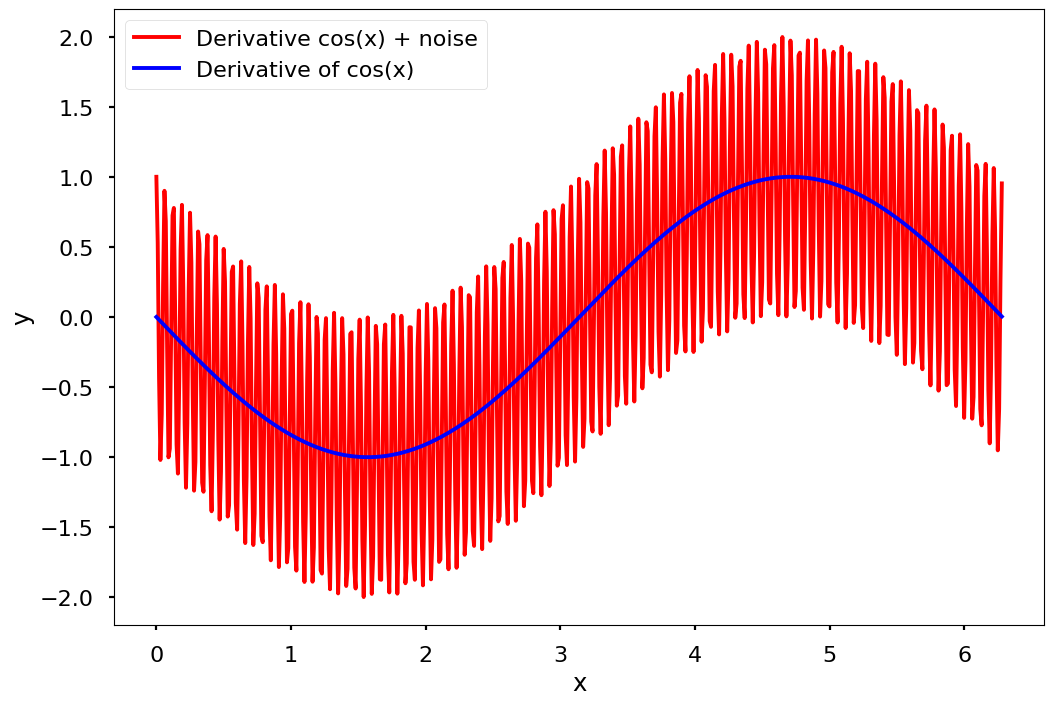

In [4]:
# plot and number imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# define omega and epsilon values
omega = 100
epsilon = .01
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# building plot for solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()